# A business problem

We want to correcly determine how much the characteristics of a house determine its price. In this way, we can evaluate how much the cost is due to market fluctuations and/or other external factors.

The goal is to then build an accurate model that predicts that price in order to find the houses that are significantly above or below their expected price.

Are there neighborhoods with inflated prices? Or deflated?

## What is the current solution?

As of now, we have prices determined by physical characteristics and unknown factors. This brings to a specific price distribution in the city and per neighborhood.

## How ML can help and performance metrics

A ML model aims to get a clear signal from the physical characteristics of each house and predict its price, the performance metric we choose RMSE as performance metric.

Moreover, we will provide conterfactual plots to further explain our model.


# Available data

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import StratifiedShuffleSplit

import statsmodels.api as sm

%matplotlib inline
pd.set_option('max_columns', 500)

In [7]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


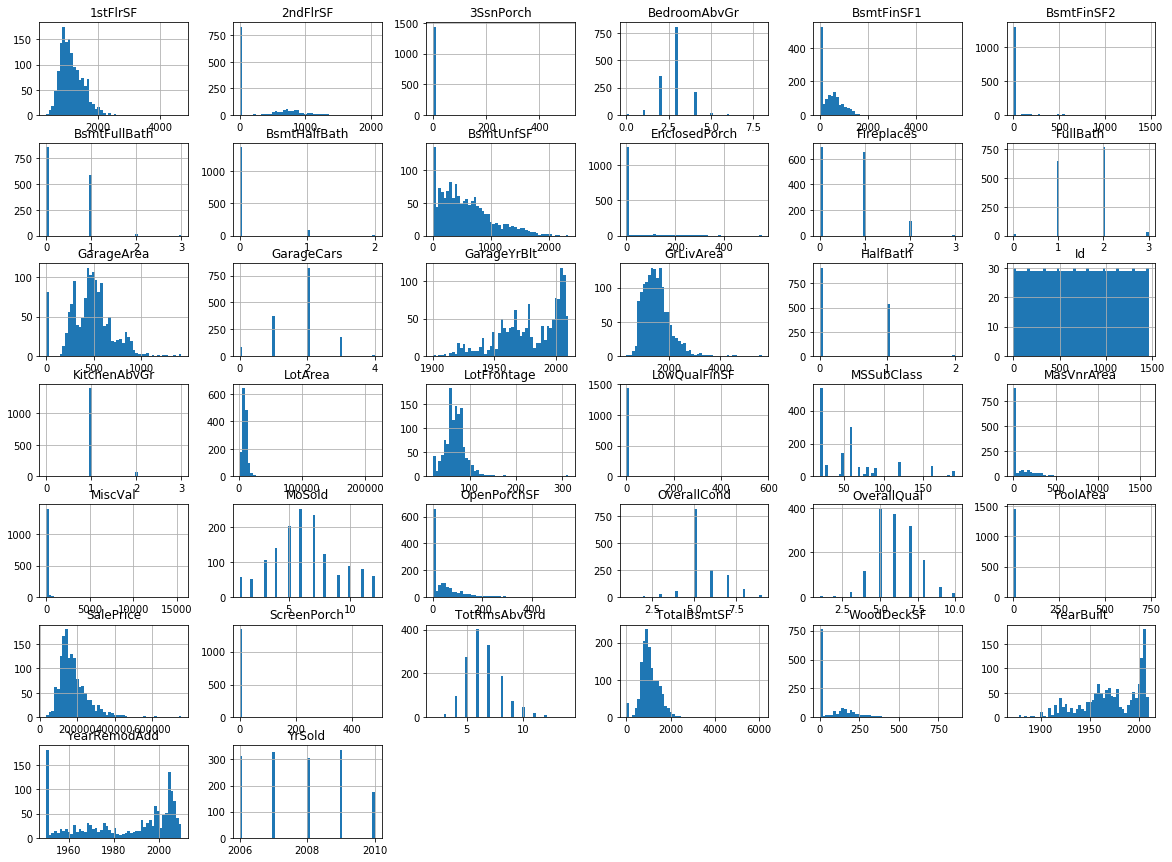

In [13]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

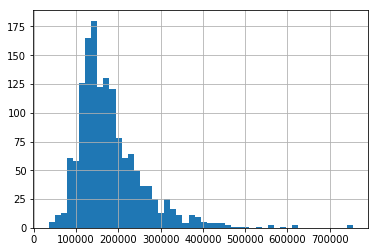

In [14]:
df_train.SalePrice.hist(bins=50)

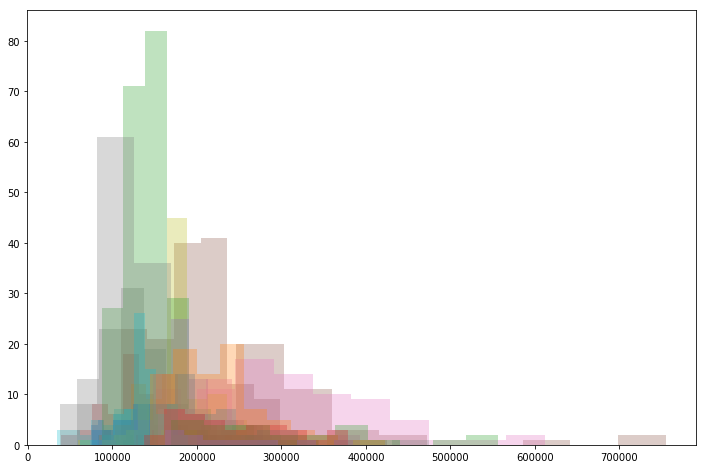

In [24]:
df_train.groupby('Neighborhood').SalePrice.hist(bins=10, alpha=0.3, figsize=(12,8))
plt.grid(False)
plt.show()

In [22]:
df_train.groupby('Neighborhood')[['SalePrice', 
                                  'GrLivArea', 
                                  'YearBuilt']].agg(['mean', 
                                                     'median', 
                                                     'std']).sort_values(('SalePrice', 
                                                                          'median'), ascending=False)

SalePrice                           GrLivArea          \
                       mean  median            std         mean  median   
Neighborhood                                                              
NridgHt       316270.623377  315000   96392.544954  1915.948052  1850.0   
NoRidge       335295.317073  301500  121412.658640  2508.853659  2418.0   
StoneBr       310499.000000  278000  112969.676640  1879.080000  1742.0   
Timber        242247.447368  228475   64845.651549  1749.368421  1689.5   
Somerst       225379.837209  225500   56177.555888  1596.651163  1564.5   
Veenker       238772.727273  218000   72369.317959  1539.636364  1437.0   
Crawfor       210624.725490  200624   68866.395472  1791.607843  1717.0   
ClearCr       212565.428571  200250   50231.538993  1788.107143  1738.0   
CollgCr       197965.773333  197200   51403.666438  1480.500000  1500.0   
Blmngtn       194870.882353  191000   30393.229219  1427.941176  1500.0   
NWAmes        189050.068493  182900   37172.218106  1727.780822  1664.0   
Gilbert       192854.506329  181000   35986.779085  1641.316456  1593.0   
SawyerW       186555.796610  179900   55651.997820  1595.016949  1603.0   
Mitchel       156270.122449  153500   36486.625334  1294.204082  1204.0   
NPkVill       142694.444444  146000    9377.314529  1253.000000  1322.0   
NAmes         145847.080000  140000   33075.345450  1310.311111  1200.0   
SWISU         142591.360000  139500   32622.917679  1801.240000  1691.0   
Blueste       137500.000000  137500   19091.883092  1392.500000  1392.5   
Sawyer        136793.135135  135000   22345.129157  1215.135135  1106.0   
BrkSide       124834.051724  124300   40348.689270  1203.068966  1210.5   
Edwards       128219.700000  121750   43208.616459  1340.040000  1200.0   
OldTown       128225.300885  119000   52650.583185  1479.725664  1374.0   
BrDale        104493.750000  106000   14330.176493  1143.187500  1155.0   
IDOTRR        100123.783784  103000   33376.710117  1142.297297  1128.0   
MeadowV        98576.470588   88000   23491.049610  1058.941176  1092.0   

                            YearBuilt                     
                     std         mean  median        std  
Neighborhood                                              
NridgHt       427.228057  2005.675325  2006.0   1.802349  
NoRidge       592.063618  1995.439024  1995.0   2.674404  
StoneBr       570.728987  1998.480000  2001.0   9.065135  
Timber        391.576124  1992.842105  2002.0  17.033395  
Somerst       294.937432  2004.988372  2006.0   3.122948  
Veenker       313.984481  1982.363636  1978.0   8.381798  
Crawfor       544.549101  1941.549020  1938.0  23.425041  
ClearCr       467.243718  1966.571429  1966.5  19.305399  
CollgCr       430.932464  1997.886667  2002.0  10.436472  
Blmngtn       138.178087  2005.235294  2005.0   1.251470  
NWAmes        416.360196  1975.630137  1976.0   6.703040  
Gilbert       297.675763  1998.253165  2000.0  10.508200  
SawyerW       507.988375  1988.559322  1991.0  13.169022  
Mitchel       377.581006  1981.755102  1982.0  14.724598  
NPkVill       237.515789  1976.444444  1976.0   1.236033  
NAmes         413.498252  1959.995556  1960.0   8.770638  
SWISU         632.355667  1925.240000  1925.0   9.270383  
Blueste       231.223917  1980.000000  1980.0   0.000000  
Sawyer        344.624883  1963.675676  1965.0  14.071353  
BrkSide       386.614222  1931.431034  1929.5  11.941542  
Edwards       655.209920  1955.970000  1954.0  28.865573  
OldTown       576.943613  1922.884956  1920.0  23.095590  
BrDale        155.828632  1971.437500  1971.0   1.030776  
IDOTRR        283.902357  1927.945946  1922.0  13.144382  
MeadowV       472.625839  1972.588235  1972.0   2.670647

Neighborhood seems quite an important feature. Let's create a test that correctly represents the distribution of houses across neighborhoods

In [25]:
df_train['Neighborhood'].value_counts() / len(df_train)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: Neighborhood, dtype: float64

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=165)

for train_index, test_index in split.split(df_train, df_train["Neighborhood"]):
    train_set = df_train.loc[train_index]
    test_set = df_train.loc[test_index]

In [29]:
train_set['Neighborhood'].value_counts() / len(train_set)

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077055
Edwards    0.068493
Somerst    0.059075
Gilbert    0.053938
NridgHt    0.053082
Sawyer     0.050514
NWAmes     0.049658
SawyerW    0.040240
BrkSide    0.039384
Crawfor    0.035103
Mitchel    0.033390
NoRidge    0.028253
IDOTRR     0.025685
Timber     0.025685
ClearCr    0.018836
SWISU      0.017123
StoneBr    0.017123
Blmngtn    0.011986
MeadowV    0.011986
BrDale     0.011130
Veenker    0.007705
NPkVill    0.005993
Blueste    0.001712
Name: Neighborhood, dtype: float64

# A couple of very simple models

In [51]:
median_price = train_set.SalePrice.median()
median_price

162250.0

In [50]:
def print_scores(train, test, inf, oof):
    print(f'Train set RMSE: {mean_squared_error(train.SalePrice, inf)}')
    print(f'Test set RMSE: {mean_squared_error(test.SalePrice, oof)}')
    print(f'Train set logRMSE: {mean_squared_log_error(train.SalePrice, inf)}')
    print(f'Test set logRMSE: {mean_squared_log_error(test.SalePrice, oof)}')
    print(f'Train set MAE: {mean_absolute_error(train.SalePrice, inf)}')
    print(f'Test set MAE: {mean_absolute_error(test.SalePrice, oof)}')

In [52]:
print_scores(train_set, test_set, [median_price]*len(train_set), [median_price]*len(test_set))

Train set RMSE: 6685928580.560787
Test set RMSE: 6533296384.393836
Train set logRMSE: 0.16661213661703908
Test set logRMSE: 0.134491301302985
Train set MAE: 56210.35359589041
Test set MAE: 52847.75684931507


In [38]:
def make_sub(df_test, prediction, filename):
    sub = df_test[['Id']].copy()
    sub['SalePrice'] = prediction
    sub.to_csv('../submissions/'+filename, index=False)

In [39]:
make_sub(df_test, [median_price] * len(df_test), 'baseline_median.csv')

In [53]:
median_price = train_set.groupby('Neighborhood', as_index=False)['SalePrice'].median()

median_price.rename(columns={'SalePrice': 'Prediction'}, inplace=True)

median_price

,Neighborhood,Prediction
0,Blmngtn,186000
1,Blueste,137500
2,BrDale,106000
3,BrkSide,127250
4,ClearCr,205750
5,CollgCr,195950
6,Crawfor,217000
7,Edwards,118750
8,Gilbert,180500
9,IDOTRR,102888


In [55]:
train_sub = pd.merge(train_set[['Neighborhood', 'SalePrice']], median_price, 
                     on='Neighborhood', how='left', validate='m:1')


test_sub = pd.merge(test_set[['Neighborhood', 'SalePrice']], median_price, 
                     on='Neighborhood', how='left', validate='m:1')

In [56]:
print_scores(train_sub, test_sub, train_sub.Prediction, test_sub.Prediction)

Train set RMSE: 2821025282.906678
Test set RMSE: 3461768632.109589
Train set logRMSE: 0.07099227294624136
Test set logRMSE: 0.06628780942637884
Train set MAE: 35266.6875
Test set MAE: 35795.732876712325


In [58]:
submission = pd.merge(df_test[['Id', 'Neighborhood']], median_price, 
                      on='Neighborhood', how='left', validate='m:1')
submission = submission.Prediction

make_sub(df_test, submission, 'baseline_by_nn.csv')

In [113]:
def regress(data, yvar, xvars):
    Y = data[yvar].copy()
    X = data[xvars].copy()
    result = sm.OLS(Y, X).fit()
    return result.params

def regress_by(data, xvars):
    xvars = xvars + ['intercept']
    trained_models = data.groupby('Neighborhood')[['SalePrice'] 
                                                  + xvars].agg(regress,
                                                               'SalePrice',
                                                               xvars)[xvars]
    return trained_models

In [124]:
to_group = train_set.copy()
to_group['intercept'] = 1

liv_area = regress_by(to_group, ['GrLivArea']).reset_index()

liv_area.rename(columns={'GrLivArea': 'coef_GLA'}, inplace=True)

liv_area

,Neighborhood,coef_GLA,intercept
0,Blmngtn,123.235916,16434.018397
1,Blueste,82.568807,22522.935780
2,BrDale,64.289416,30207.239618
3,BrkSide,87.097693,19932.520368
4,ClearCr,19.579447,181994.967336
5,CollgCr,103.325526,45995.309835
6,Crawfor,94.305638,45954.929314
7,Edwards,22.638872,91505.956493
8,Gilbert,70.688877,76733.965091
9,IDOTRR,70.755423,16090.120445


In [125]:
train_sub = pd.merge(train_set[['Neighborhood', 'SalePrice', 'GrLivArea']], liv_area, 
                     on='Neighborhood', how='left', validate='m:1')

train_sub['Prediction'] = train_sub.intercept + train_sub.GrLivArea * train_sub.coef_GLA

train_sub.head()

,Neighborhood,SalePrice,GrLivArea,coef_GLA,intercept,Prediction
0,Edwards,125000,1125,22.638872,91505.956493,116974.687338
1,NAmes,148500,1002,56.742228,70429.526962,127285.239230
2,Edwards,176000,1132,22.638872,91505.956493,117133.159441
3,NWAmes,157000,1601,69.244394,70524.440738,181384.715300
4,Edwards,198500,1922,22.638872,91505.956493,135017.868212


In [126]:
test_sub = pd.merge(test_set[['Neighborhood', 'SalePrice', 'GrLivArea']], liv_area, 
                     on='Neighborhood', how='left', validate='m:1')

test_sub['Prediction'] = test_sub.intercept + test_sub.GrLivArea * test_sub.coef_GLA

test_sub.head()

,Neighborhood,SalePrice,GrLivArea,coef_GLA,intercept,Prediction
0,IDOTRR,81000,894,70.755423,16090.120445,79345.468797
1,Timber,167500,1394,95.686500,78629.667625,212016.648412
2,BrkSide,110000,1203,87.097693,19932.520368,124711.044945
3,Mitchel,124500,816,61.408276,80763.377814,130872.531078
4,OldTown,105000,1374,58.720952,40391.708543,121074.296123


In [127]:
print_scores(train_sub, test_sub, train_sub.Prediction, test_sub.Prediction)

Train set RMSE: 1196998438.8742359
Test set RMSE: 1634318208.8169055
Train set logRMSE: 0.03481837011710788
Test set logRMSE: 0.03767685839377166
Train set MAE: 24314.607842565136
Test set MAE: 26474.165982408365


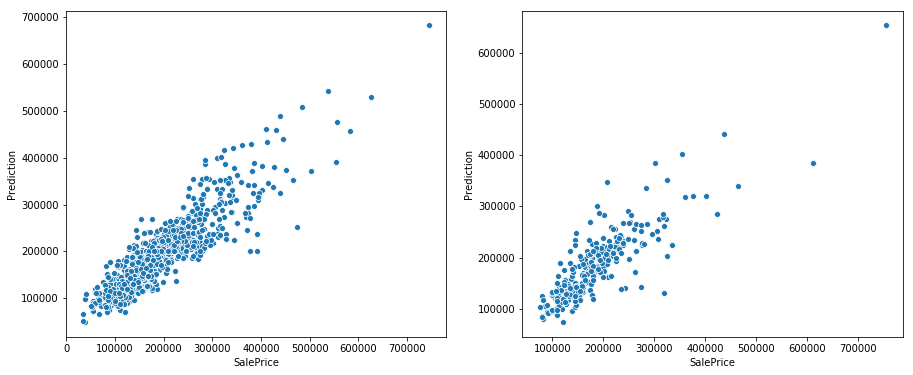

In [131]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(x='SalePrice', y='Prediction', data=train_sub, ax=ax[0])
sns.scatterplot(x='SalePrice', y='Prediction', data=test_sub, ax=ax[1])

In [121]:
submission = pd.merge(df_test[['Id', 'Neighborhood', 'GrLivArea']], liv_area, 
                      on='Neighborhood', how='left', validate='m:1')

submission = submission.intercept + submission.GrLivArea * submission.coef_GLA

make_sub(df_test, submission, 'linear_by_nn.csv')

In [132]:
to_group = train_set.copy()
to_group['intercept'] = 1

liv_area = regress_by(to_group, ['GrLivArea', 'YearBuilt']).reset_index()

liv_area.rename(columns={'GrLivArea': 'coef_GLA', 'YearBuilt': 'coef_YB'}, inplace=True)

liv_area

,Neighborhood,coef_GLA,coef_YB,intercept
0,Blmngtn,124.872696,-4636.842972,9.313261e+06
1,Blueste,82.568807,11.375217,5.745059e-03
2,BrDale,83.620932,4947.350977,-9.745758e+06
3,BrkSide,83.584386,-313.935781,6.306430e+05
4,ClearCr,25.607428,568.363337,-9.458036e+05
5,CollgCr,93.792730,859.249903,-1.656792e+06
6,Crawfor,91.707945,1184.072176,-2.248394e+06
7,Edwards,13.426172,584.019869,-1.037878e+06
8,Gilbert,64.854622,933.313552,-1.778163e+06
9,IDOTRR,80.839625,602.688035,-1.157232e+06


In [133]:
train_sub = pd.merge(train_set[['Neighborhood', 'SalePrice', 'GrLivArea', 'YearBuilt']], liv_area, 
                     on='Neighborhood', how='left', validate='m:1')

train_sub['Prediction'] = train_sub.intercept + train_sub.GrLivArea * train_sub.coef_GLA + train_sub.YearBuilt * train_sub.coef_YB

train_sub.head()

,Neighborhood,SalePrice,GrLivArea,YearBuilt,coef_GLA,coef_YB,intercept,Prediction
0,Edwards,125000,1125,1976,13.426172,584.019869,-1.037878e+06,131249.291244
1,NAmes,148500,1002,1970,57.469773,972.045293,-1.835476e+06,137038.330714
2,Edwards,176000,1132,2005,13.426172,584.019869,-1.037878e+06,148279.850656
3,NWAmes,157000,1601,1978,66.975735,1306.871301,-2.508150e+06,184069.432041
4,Edwards,198500,1922,2003,13.426172,584.019869,-1.037878e+06,157718.486677


In [134]:
test_sub = pd.merge(test_set[['Neighborhood', 'SalePrice', 'GrLivArea', 'YearBuilt']], liv_area, 
                     on='Neighborhood', how='left', validate='m:1')

test_sub['Prediction'] = test_sub.intercept + test_sub.GrLivArea * test_sub.coef_GLA + test_sub.YearBuilt * test_sub.coef_YB

test_sub.head()

,Neighborhood,SalePrice,GrLivArea,YearBuilt,coef_GLA,coef_YB,intercept,Prediction
0,IDOTRR,81000,894,1935,80.839625,602.688035,-1.157232e+06,81239.960185
1,Timber,167500,1394,2006,94.596600,1629.267325,-3.165721e+06,234457.271915
2,BrkSide,110000,1203,1950,83.584386,-313.935781,6.306430e+05,119020.212185
3,Mitchel,124500,816,1982,55.840072,689.420025,-1.279179e+06,132816.825464
4,OldTown,105000,1374,1920,74.420581,684.435789,-1.297603e+06,118767.680596


In [137]:
print_scores(train_sub, test_sub, train_sub.Prediction, test_sub.Prediction)

Train set RMSE: 978297352.9053295
Test set RMSE: 1409757852.3212621
Train set logRMSE: 0.029274034301233688
Test set logRMSE: 0.033691623815527615
Train set MAE: 21903.467942294577
Test set MAE: 24224.07458933197


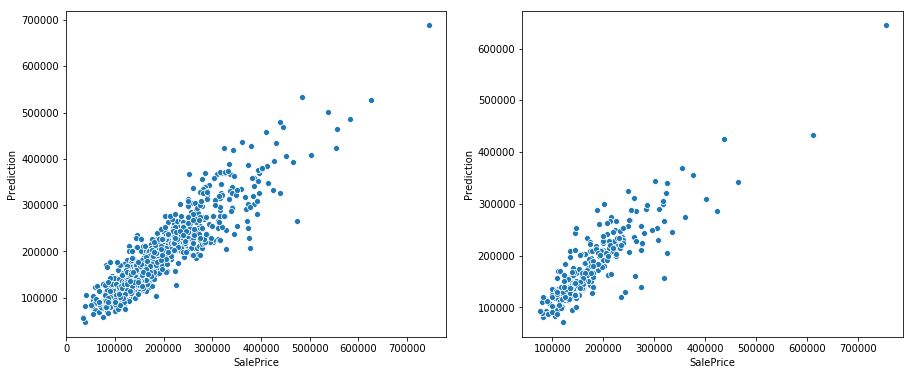

In [135]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(x='SalePrice', y='Prediction', data=train_sub, ax=ax[0])
sns.scatterplot(x='SalePrice', y='Prediction', data=test_sub, ax=ax[1])

In [136]:
submission = pd.merge(df_test[['Id', 'Neighborhood', 'GrLivArea', 'YearBuilt']], liv_area, 
                      on='Neighborhood', how='left', validate='m:1')

submission = submission.intercept + submission.GrLivArea * submission.coef_GLA + submission.YearBuilt * submission.coef_YB

make_sub(df_test, submission, 'linear_by_nn_yr.csv')